In [4]:
import os
import sys
import importlib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [5]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [6]:
sys.path.append(join_path('EMIT-ECOSTRESS\\modules'))
import datasets.Datasets
import models.Feedforward
import utils.train
import utils.eval

In [7]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

In [8]:
base_data_path = 'Data\\Dataset\\Splits'
log_file_path = join_path(r'Miscellaneous\linear_benchmark_log.txt')

# load data

emit_train = pickle_load(
    os.path.join(base_data_path, 'reflectance_train_pca244.pkl')
)
emit_val = pickle_load(
    os.path.join(base_data_path, 'reflectance_val_pca244.pkl')
)

elev_train = pickle_load(
    os.path.join(base_data_path, 'elevation_train.pkl')
)
elev_val = pickle_load(os.path.join(base_data_path, 'elevation_val.pkl'))

elev_train = (
    (
        elev_train - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
elev_val = (
    (
        elev_val - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
eco_train = pickle_load(os.path.join(base_data_path, 'temp_train.pkl'))
eco_val = pickle_load(os.path.join(base_data_path, 'temp_val.pkl'))

In [9]:
benchmark_combos = [
    # (0, 0), (0, 1),
    # (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8),
    # (0, 10), (0, 12), (0, 16), (0, 24), (0, 32), (0, 48), (0, 64),
    # (0, 96), (0, 128), (0, 244),
    # (1, 2), (1, 3), (1, 4), (1, 8), (1, 16), (1, 32), (1, 48), (1, 64),
    # (2, 2), (2, 4), (2, 8), (2, 16), (2, 32), (2, 48),
    # (3, 2), (3, 4), (3, 8), (3, 16), (3, 32), (3, 48),
    # (4, 2), (4, 3), (4, 4), (4, 8), (4, 16), (4, 32), (4, 48),
    # (5, 2), (5, 3), (5, 4), (5, 8), (5, 16), (5, 32), (5, 48),
    # (6, 2), (6, 4), (6, 8), (6, 16), (6, 32),
    # (7, 2), (7, 4), (7, 8), (7, 16),
    # (8, 2), (8, 4), (8, 8), (8, 16),
    # (9, 2), (9, 4), (9, 8),
    # (10, 2), (10, 4), (10, 8),
    # (11, 2), (11, 4), (11, 6),
    (12, 2), (12, 3), (12, 4), (12, 5), (12, 6),
    # (13, 1), (13, 2), (13, 3), (13, 4), (13, 5),
    (14, 1), (14, 2), (14, 3), (14, 4), (14, 5),
    # (15, 1), (15, 2), (15, 3), (15, 4), (15, 5),
    (16, 1), (16, 2), (16, 3), (16, 4), (16, 5),
    # (17, 1), (17, 2), (17, 3), (17, 4), (17, 5),
    (18, 1), (18, 2), (18, 3), (18, 4), (18, 5),
    # (19, 1), (19, 2), (19, 3), (19, 4), (19, 5),
    (20, 1), (20, 2), (20, 3), (20, 4), (20, 5),
    # (21, 1), (21, 2), (21, 3), (21, 4), (21, 5),
    (22, 1), (22, 2), (22, 3), (22, 4), (22, 5),
    # (23, 1), (23, 2), (23, 3), (23, 4), (23, 5),
    (24, 1), (24, 2), (24, 3), (24, 4), (24, 5),
    (32, 1), (32, 2), (32, 3), (32, 4), (32, 5),
]

len(benchmark_combos)

40

In [10]:
benchmark_combos = [(9, 8)]

radius=12, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=1875, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.4732,  4.3697   	 Val (RMSE, K):  1.1059,  2.9642   	LR:  0.001	Time: 77.5
Epoch 001:     Train (RMSE, K):  0.57385,  1.7022   	 Val (RMSE, K):  0.60038,  1.6093   	LR:  0.001	Time: 78.4


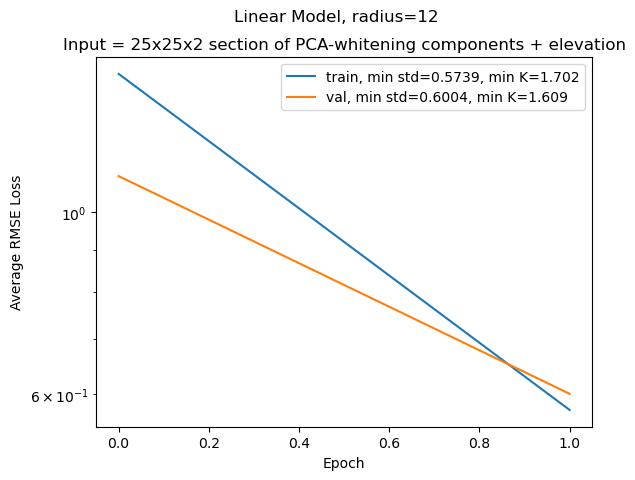

radius=12, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=2500, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.82203,  2.4383   	 Val (RMSE, K):  0.93412,  2.5039   	LR:  0.001	Time: 77.6
Epoch 001:     Train (RMSE, K):   0.573,  1.6997   	 Val (RMSE, K):  0.58504,  1.5681   	LR:  0.001	Time: 80.3


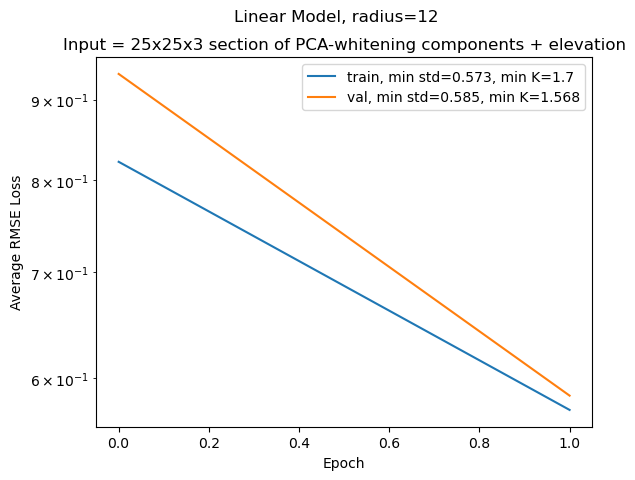

radius=12, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=3125, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.92771,  2.7518   	 Val (RMSE, K):  1.1706,  3.1378   	LR:  0.001	Time: 78.5
Epoch 001:     Train (RMSE, K):  0.57082,  1.6932   	 Val (RMSE, K):  0.57082,    1.53   	LR:  0.001	Time: 80.5


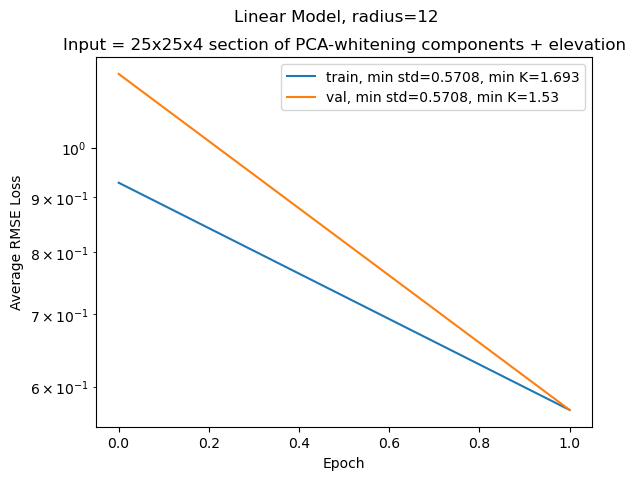

radius=12, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=3750, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.3492,  4.0021   	 Val (RMSE, K):  1.0446,     2.8   	LR:  0.001	Time: 1.1e+02
Epoch 001:     Train (RMSE, K):  0.57884,   1.717   	 Val (RMSE, K):  0.66087,  1.7714   	LR:  0.001	Time: 1.13e+02


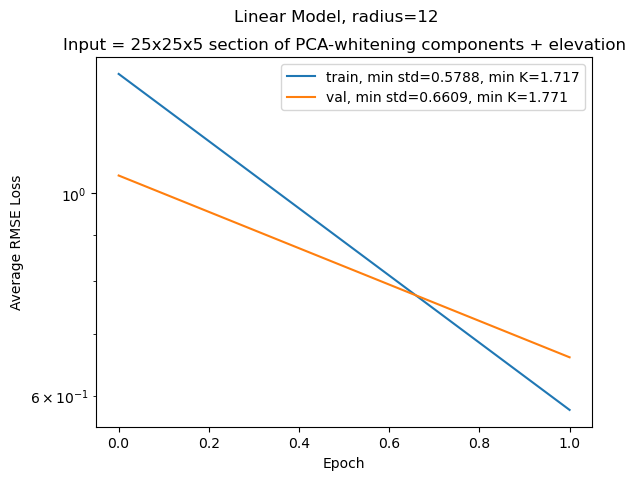

radius=12, n_components=6
 LinearModel(
  (linear_output): Linear(in_features=4375, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.4624,  4.3379   	 Val (RMSE, K):  1.1612,  3.1126   	LR:  0.001	Time: 1.14e+02
Epoch 001:     Train (RMSE, K):  0.57402,  1.7027   	 Val (RMSE, K):  0.59784,  1.6025   	LR:  0.001	Time: 1.16e+02


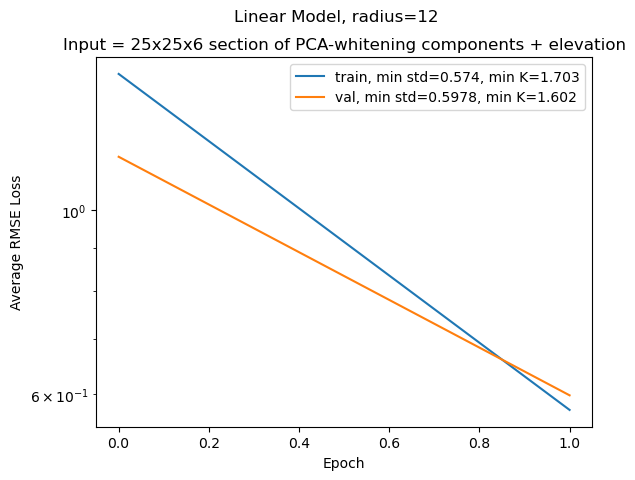

radius=14, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=1682, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.672,  4.9595   	 Val (RMSE, K):  1.3155,  3.5261   	LR:  0.001	Time: 94.8
Epoch 001:     Train (RMSE, K):  0.70563,  2.0931   	 Val (RMSE, K):  0.88726,  2.3782   	LR:  0.001	Time: 96.0


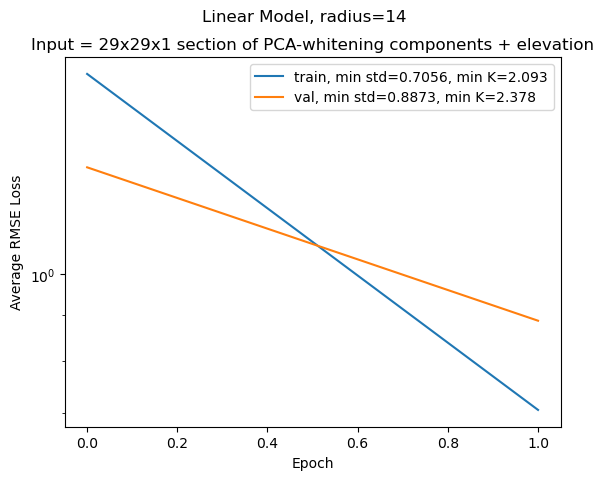

radius=14, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=2523, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1045,  3.2761   	 Val (RMSE, K):  1.0423,  2.7938   	LR:  0.001	Time: 99.4
Epoch 001:     Train (RMSE, K):  0.56925,  1.6885   	 Val (RMSE, K):  0.80865,  2.1675   	LR:  0.001	Time: 99.8


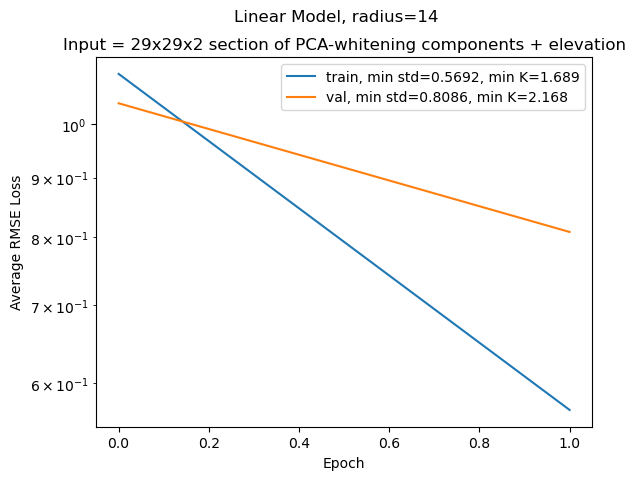

radius=14, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=3364, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1859,  3.5177   	 Val (RMSE, K):  1.0026,  2.6873   	LR:  0.001	Time: 1.01e+02
Epoch 001:     Train (RMSE, K):    0.58,  1.7204   	 Val (RMSE, K):   0.547,  1.4662   	LR:  0.001	Time: 1e+02


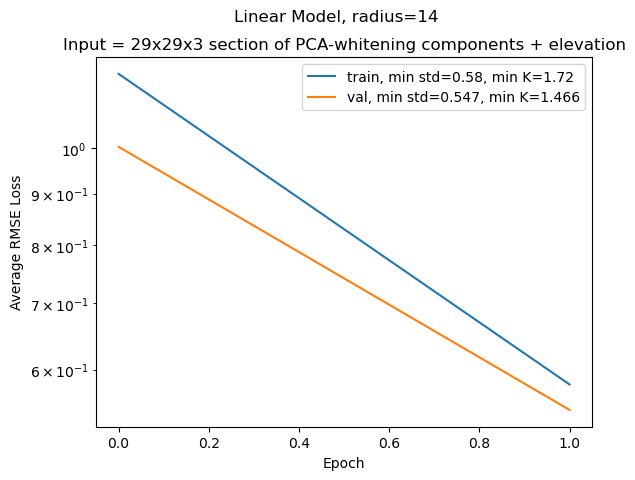

radius=14, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=4205, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.90635,  2.6884   	 Val (RMSE, K):  0.92776,  2.4868   	LR:  0.001	Time: 1.41e+02
Epoch 001:     Train (RMSE, K):  0.57836,  1.7155   	 Val (RMSE, K):  0.6538,  1.7525   	LR:  0.001	Time: 1.42e+02


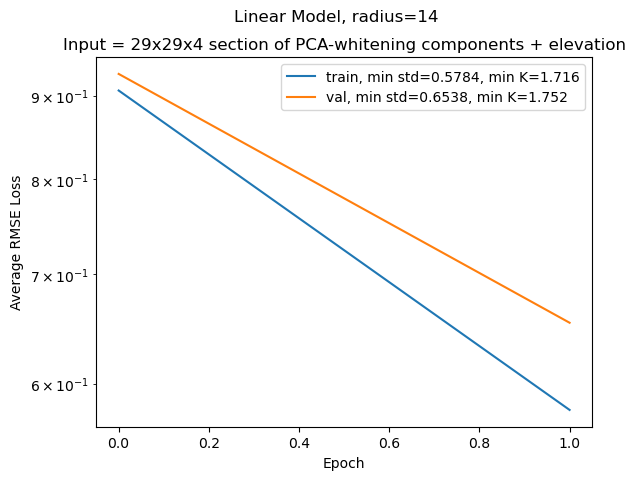

radius=14, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=5046, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.2046,  3.5731   	 Val (RMSE, K):  1.1049,  2.9617   	LR:  0.001	Time: 1.4e+02
Epoch 001:     Train (RMSE, K):  0.58523,  1.7359   	 Val (RMSE, K):  0.67424,  1.8072   	LR:  0.001	Time: 1.44e+02


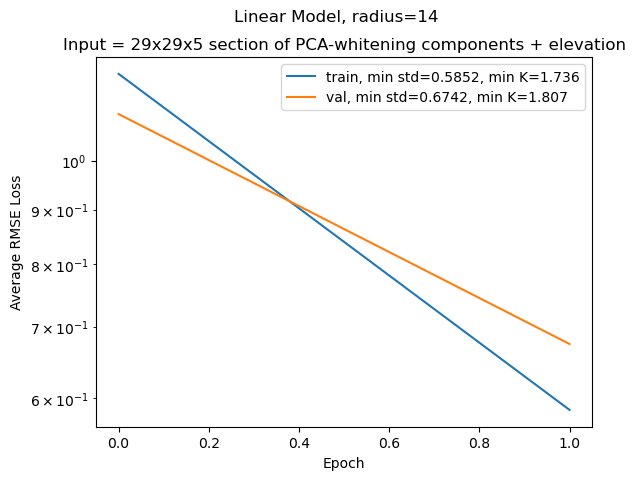

radius=16, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=2178, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.92679,  2.7491   	 Val (RMSE, K):  0.83822,  2.2468   	LR:  0.001	Time: 1.16e+02
Epoch 001:     Train (RMSE, K):  0.70104,  2.0794   	 Val (RMSE, K):  1.3138,  3.5215   	LR:  0.001	Time: 1.22e+02


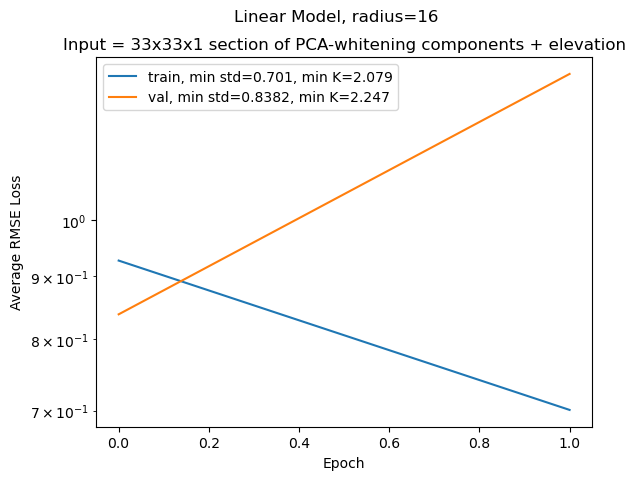

radius=16, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=3267, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0471,  3.1059   	 Val (RMSE, K):   1.083,  2.9029   	LR:  0.001	Time: 1.22e+02
Epoch 001:     Train (RMSE, K):  0.57537,  1.7067   	 Val (RMSE, K):  0.56244,  1.5076   	LR:  0.001	Time: 1.26e+02


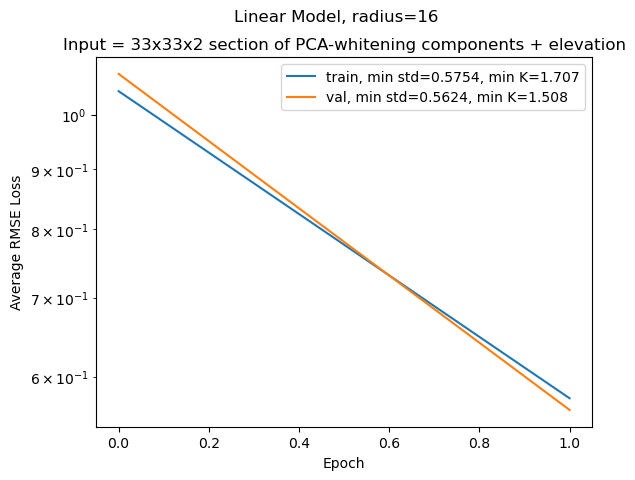

radius=16, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=4356, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.3382,  3.9694   	 Val (RMSE, K):  1.0962,  2.9382   	LR:  0.001	Time: 1.66e+02


In [10]:
importlib.reload(datasets.Datasets)
importlib.reload(models.Feedforward)
importlib.reload(utils.train)
importlib.reload(utils.eval)

batch_size = 256
val_batch_size = 1024

n_epochs = 1
dropout_rate = 0

stats_list = []
train_loss_array_list = []
val_loss_array_list = []
train_loss_list = []
val_loss_list = []

stats = None
print('Start Training', file=open(log_file_path, 'w'))
try:
    for combo in benchmark_combos:
        radius, n = combo

        omit_components = 244 - n

        # create datasets and dataloaders

        train_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_train,
            omit_components=omit_components,
            ecostress_data=eco_train,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_train,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        val_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_val,
            omit_components=omit_components,
            ecostress_data=eco_val,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_val,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        if batch_size is not None:
            train_loader = DataLoader(
                dataset=train_dataset,
                batch_size=batch_size,
                drop_last=False,
                shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset,
                batch_size=val_batch_size,
                drop_last=False,
                shuffle=False,
            )
        else:
            train_loader = DataLoader(
                dataset=train_dataset, batch_size=batch_size, shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset, batch_size=batch_size, shuffle=False,
            )
            
        
        model = models.Feedforward.LinearModel(
            input_dim=train_dataset.input_dim,
            radius=radius,
            dropout_rate=dropout_rate,
        )
        
        if device == 'cuda':
            model = model.cuda()

        optimizer = optim.Adam(
            params=model.parameters(), lr=0.001, weight_decay=0, fused=True
        )

        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer=optimizer, factor=0.2, patience=2
        )

        loss_fn = nn.MSELoss(reduction='sum')

        print(f'radius={combo[0]}, n_components={combo[1]}\n', model)
        print(
            f'radius={combo[0]}, n_components={combo[1]}\n',
            model,
            file=open(log_file_path, 'a'),
        )
        
        train_loss, val_loss, eval_stats, train_loss_array, val_loss_array = (
            utils.train.train(
                model,
                optimizer,
                scheduler,
                loss_fn,
                train_loader,
                val_loader,
                n_epochs=n_epochs,
                loss_interval=1,
                # preexisting_losses=[train_loss, val_loss],
                device=device,
                log_file_path=log_file_path,
            )
        )
        
        eval_stats = np.concatenate([np.array(combo), eval_stats])
        stats_list.append(eval_stats)
        train_loss_array_list.append(train_loss_array)
        val_loss_array_list.append(val_loss_array)
        train_loss_list.append(train_loss)
        val_loss_array_list.append(val_loss)
        
        
        fig, ax = plt.subplots()
        fig.suptitle(
            f'Linear Model, radius={radius}'
        )
        l = 2 * radius + 1
        ax.set_title(
            f'Input = {l}x{l}x{244 - omit_components} section of '
            'PCA-whitening components + elevation'
        )
        ax.semilogy(
            np.arange(len(train_loss)),
            train_loss,
            label=(
                'train, '
                f'min std={min(train_loss):.4}, '
                f'min K={train_dataset.ecostress_scale * min(train_loss):.4}'
            ),
        )
        ax.semilogy(
            np.arange(len(val_loss)),
            val_loss,
            label=(
                'val, '
                f'min std={min(val_loss):.4}, '
                f'min K={val_dataset.ecostress_scale * min(val_loss):.4}'
            ),
        )
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Average RMSE Loss')
        ax.legend()
        plt.show(fig)
        
        torch.save(
            model.state_dict(),
            join_path(f'Data\\Models\\linear_r{radius}_n{n}.pt')
        )
        
    stats = np.array(stats_list)
    stats_columns = utils.eval.initialize_eval_results().columns.to_list()
    stats = pd.DataFrame(stats, columns=stats_columns)
    stats['radius'] = stats['radius'].astype(int)
    stats['n_components'] = stats['n_components'].astype(int)
        
except KeyboardInterrupt:
    print('Training was interrupted by user')
    print('Training was interrupted by user', file=open(log_file_path, 'a'))

stats

In [ ]:
stats.to_csv(join_path(r'Miscellaneous\linear_benchmarking_pca_temp.csv'))

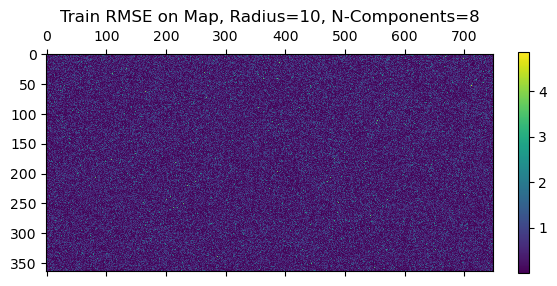

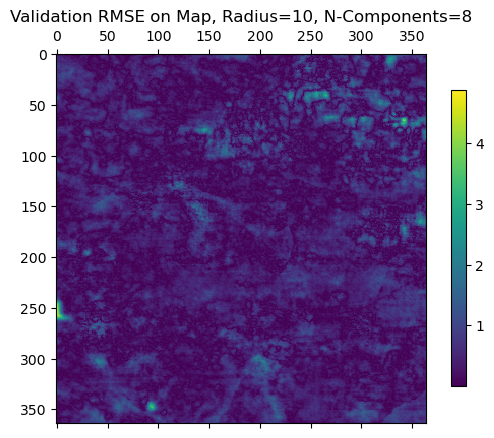

In [25]:
fig, ax = plt.subplots()
ax.set_title('Train RMSE on Map, Radius=10, N-Components=8')
plt.imshow(train_loss_array)
plt.colorbar(fraction=0.05, shrink=0.6)
ax.matshow(train_loss_array)
plt.show(fig)
fig, ax = plt.subplots()
ax.set_title('Validation RMSE on Map, Radius=10, N-Components=8')
plt.imshow(train_loss_array)
plt.colorbar(fraction=0.05, shrink=0.8)
ax.matshow(val_loss_array)
plt.show(fig)

In [ ]:
n_components_benchmark_radii = [0]
#[0, 1, 3, 8, 16]
n_components_benchmark_n_components = [1, 2, 3, 4, 5, 8, 10, 12, 16,]
#[1, 2, 3, 4, 8, 16, 32, 64, 128, 244]

radius_benchmark_radii = []#[0, 1, 2, 3, 4, 8, 16]
radius_benchmark_n_components = []#[8, 16, 32, 64, 244]

benchmark_combos = []
for radius in n_components_benchmark_radii:
    for n in n_components_benchmark_n_components:
        benchmark_combos.append((radius, n))

for radius in radius_benchmark_radii:
    for n in radius_benchmark_n_components:
        if (radius, n) in benchmark_combos:
            continue
        else:
            benchmark_combos.append((radius, n))

len(benchmark_combos)

1